## Customer Shopping Data

Import Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

1. Get Data

In [2]:
# Get data file names
cs = pd.read_csv('/Users/nikhilsharma/Desktop/Data/Datasets/customer_shopping_data.csv')

2. Check Data Shape

In [3]:
print(cs.shape)

(99457, 10)


3. Check Data Columns

In [4]:
print(cs.columns)

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')


4. Check Data Types

In [5]:
cs.dtypes
print(cs['invoice_date'])

0          5/8/2022
1        12/12/2021
2         9/11/2021
3        16/05/2021
4        24/10/2021
            ...    
99452    21/09/2022
99453    22/09/2021
99454    28/03/2021
99455    16/03/2021
99456    15/10/2022
Name: invoice_date, Length: 99457, dtype: object


5. Convert Invoice Date to Datetime Type

In [6]:
cs['invoice_date'] = pd.to_datetime(cs['invoice_date'], format='%d/%m/%Y')
print(cs['invoice_date'])

0       2022-08-05
1       2021-12-12
2       2021-11-09
3       2021-05-16
4       2021-10-24
           ...    
99452   2022-09-21
99453   2021-09-22
99454   2021-03-28
99455   2021-03-16
99456   2022-10-15
Name: invoice_date, Length: 99457, dtype: datetime64[ns]


6. Create Date, Month & Year Columns from Invoice Date

In [7]:
cs['year_invoice'] = cs['invoice_date'].dt.year
cs['month_invoice'] = cs['invoice_date'].dt.month
cs['date_invoice'] = cs['invoice_date'].dt.day

print(cs.dtypes)

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
year_invoice               int64
month_invoice              int64
date_invoice               int64
dtype: object


7. Check for Missing Values

In [8]:
cs.isna().any()
cs.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
year_invoice      0
month_invoice     0
date_invoice      0
dtype: int64

8. Number & Proportion of Categories

In [9]:
print(cs['category'].value_counts())
print(cs['category'].value_counts(normalize=True))

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64
Clothing           0.346753
Cosmetics          0.151794
Food & Beverage    0.148567
Toys               0.101421
Shoes              0.100888
Souvenir           0.050263
Technology         0.050233
Books              0.050082
Name: category, dtype: float64


9. Gender Count

In [10]:
print(cs['gender'].value_counts())
print(cs['gender'].value_counts(normalize=True))

Female    59482
Male      39975
Name: gender, dtype: int64
Female    0.598068
Male      0.401932
Name: gender, dtype: float64


10. Age Count

In [11]:
print(cs['age'].value_counts().head(5))
print(cs['age'].value_counts(normalize=True).head(5))

37    2057
22    2051
64    2002
43    2000
51    1993
Name: age, dtype: int64
37    0.020682
22    0.020622
64    0.020129
43    0.020109
51    0.020039
Name: age, dtype: float64


11. Payment Method Count

In [12]:
print(cs['payment_method'].value_counts())
print(cs['payment_method'].value_counts(normalize=True))

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64
Cash           0.446897
Credit Card    0.351217
Debit Card     0.201886
Name: payment_method, dtype: float64


12. Shopping Mall Count

In [13]:
print(cs['shopping_mall'].value_counts())

print(cs['shopping_mall'].value_counts(normalize=True))

Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64
Mall of Istanbul     0.200519
Kanyon               0.199312
Metrocity            0.150930
Metropol AVM         0.102165
Istinye Park         0.098344
Zorlu Center         0.051027
Cevahir AVM          0.050182
Forum Istanbul       0.049740
Viaport Outlet       0.049408
Emaar Square Mall    0.048373
Name: shopping_mall, dtype: float64


13. Invoice Date Count

In [14]:
print(cs['invoice_date'].value_counts())
print(cs['invoice_date'].value_counts(normalize=True))

2021-11-24    159
2023-02-26    156
2021-01-06    155
2022-07-25    155
2022-10-23    155
             ... 
2021-10-27     98
2021-05-29     98
2021-09-30     96
2021-12-02     94
2022-01-16     93
Name: invoice_date, Length: 797, dtype: int64
2021-11-24    0.001599
2023-02-26    0.001569
2021-01-06    0.001558
2022-07-25    0.001558
2022-10-23    0.001558
                ...   
2021-10-27    0.000985
2021-05-29    0.000985
2021-09-30    0.000965
2021-12-02    0.000945
2022-01-16    0.000935
Name: invoice_date, Length: 797, dtype: float64


14. Invoice Year Count

In [15]:
print(cs['year_invoice'].value_counts())
print(cs['year_invoice'].value_counts(normalize=True))

2022    45551
2021    45382
2023     8524
Name: year_invoice, dtype: int64
2022    0.457997
2021    0.456298
2023    0.085705
Name: year_invoice, dtype: float64


15. Invoice Month Count

In [16]:
print(cs['month_invoice'].value_counts())
print(cs['month_invoice'].value_counts(normalize=True))

1     11608
2     10482
3      8730
7      7877
10     7764
5      7697
12     7680
8      7635
6      7581
11     7563
4      7487
9      7353
Name: month_invoice, dtype: int64
1     0.116714
2     0.105392
3     0.087777
7     0.079200
10    0.078064
5     0.077390
12    0.077219
8     0.076767
6     0.076224
11    0.076043
4     0.075279
9     0.073931
Name: month_invoice, dtype: float64


16. Invoice Day Count

In [17]:
print(cs['date_invoice'].value_counts().head())
print(cs['date_invoice'].value_counts(normalize=True).head())

3    3426
4    3422
5    3419
7    3401
6    3396
Name: date_invoice, dtype: int64
3    0.034447
4    0.034407
5    0.034377
7    0.034196
6    0.034145
Name: date_invoice, dtype: float64


17. Max & Min Date

In [18]:
print(cs['invoice_date'].min() , ' to ' ,cs['invoice_date'].max())

2021-01-01 00:00:00  to  2023-03-08 00:00:00


18. Calculate Revenue

In [19]:
cs['revenue']= cs['price'] * cs['quantity']

19. Sort by Revenue

In [20]:
cs.sort_values(by='revenue', ascending=False)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year_invoice,month_invoice,date_invoice,revenue
66026,I251006,C115362,Male,28,Technology,5,5250.00,Cash,2021-07-16,Metropol AVM,2021,7,16,26250.00
32502,I327417,C277412,Female,56,Technology,5,5250.00,Cash,2021-10-28,Metropol AVM,2021,10,28,26250.00
50508,I129008,C816362,Female,39,Technology,5,5250.00,Cash,2022-09-23,Istinye Park,2022,9,23,26250.00
32479,I213740,C968145,Male,69,Technology,5,5250.00,Cash,2022-09-13,Istinye Park,2022,9,13,26250.00
96366,I216069,C491682,Male,69,Technology,5,5250.00,Cash,2021-10-03,Kanyon,2021,10,3,26250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87725,I218551,C118564,Male,53,Food & Beverage,1,5.23,Debit Card,2021-10-18,Metrocity,2021,10,18,5.23
36537,I255926,C249889,Female,55,Food & Beverage,1,5.23,Credit Card,2021-05-27,Metropol AVM,2021,5,27,5.23
36573,I669105,C267906,Female,25,Food & Beverage,1,5.23,Cash,2021-05-07,Kanyon,2021,5,7,5.23
69858,I199671,C708302,Female,25,Food & Beverage,1,5.23,Credit Card,2022-10-03,Cevahir AVM,2022,10,3,5.23


In [24]:
cs.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall',
       'year_invoice', 'month_invoice', 'date_invoice', 'revenue'],
      dtype='object')

20. Visualize Data

a. Payment Method 

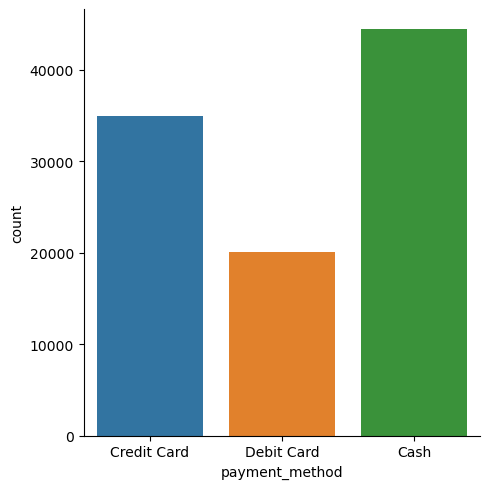

In [25]:
sns.catplot(data=cs, x='payment_method', kind='count')

b. Gender

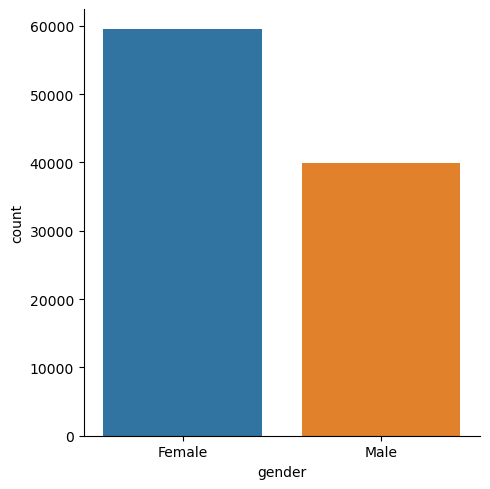

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=cs, x='gender')
plt.title('Count of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

c. Shopping Malls

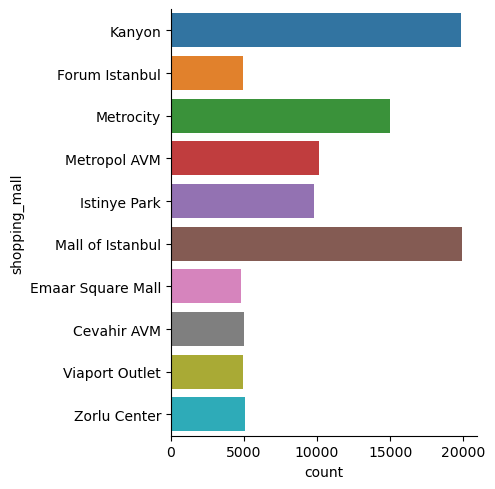

In [27]:
sns.catplot(data=cs, y='shopping_mall', kind='count')

d. Age Distribution of Customers

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=cs, x='age', bins=10)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

e. Pie Chart of Distribution of Payment Methods

In [ ]:
payment_counts = cs['payment_method'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%')
plt.title('Proportional Distribution of Payment Methods')
plt.show()

f. Scatterplot showing Relationship between Quantity and Price

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cs, x='quantity', y='price')
plt.title('Relationship between Quantity and Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

g. Monthly Sales & Revenue Trend

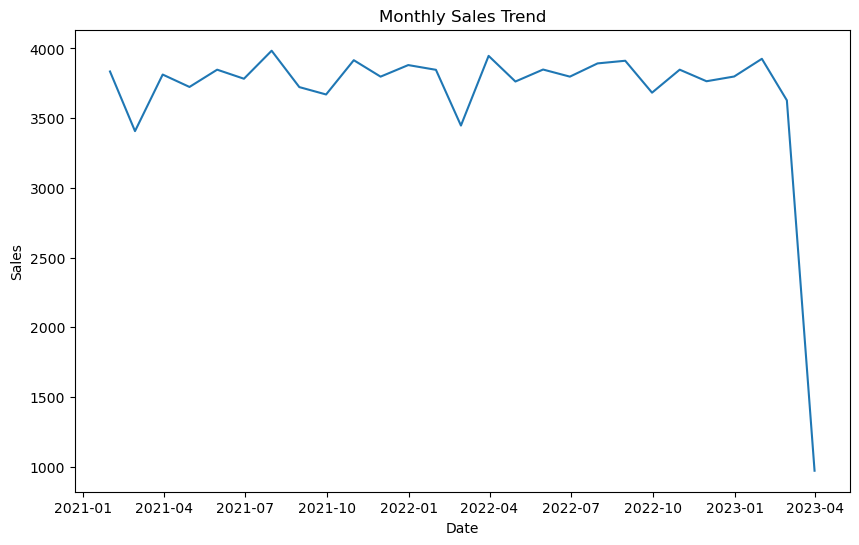

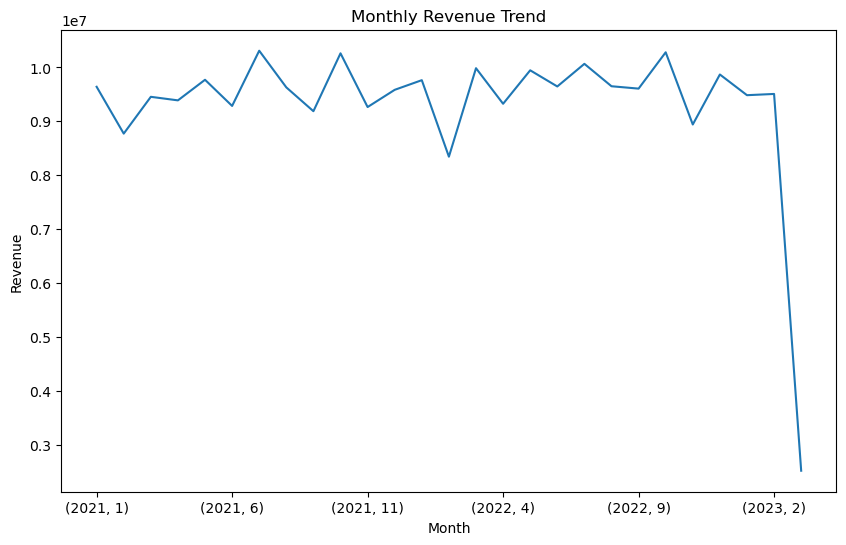

In [31]:
cs['invoice_date'] = pd.to_datetime(cs['invoice_date'])
monthly_sales = cs.resample('M', on='invoice_date').size()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


monthly_revenue = cs.groupby(['year_invoice', 'month_invoice'])['revenue'].sum()
plt.figure(figsize=(10, 6))
monthly_revenue.plot()
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

h. Category-wise Sales

In [ ]:
category_sales = cs.groupby('category')['quantity'].sum()
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', stacked=True)
plt.title('Category-wise Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

i. Correlation Matrix: Price, Quantity & Age

In [ ]:
correlation_matrix = cs[['age', 'quantity', 'price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

j. Price Distribution by Category

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cs, x='category', y='price')
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

k. Bar Chart with Error Bars - Mean Price by Category

In [ ]:
plt.figure(figsize=(10, 6))
mean_price_by_category.plot(kind='bar', yerr=std_price_by_category)
plt.title('Mean Price by Category')
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.show()


l. Price Distribution by Category & Gender

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cs, x='category', y='price', hue='gender')
plt.title('Price Distribution by Category and Gender')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

m. Count of Invoices by Year

In [ ]:
plt.figure(figsize=(8, 6))
cs['year_invoice'].value_counts().sort_index().plot(kind='bar')
plt.title('Count of Invoices by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

n. Count of Customers by Shopping Mall

In [ ]:
plt.figure(figsize=(8, 6))
cs['shopping_mall'].value_counts().plot(kind='bar')
plt.title('Count of Customers by Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Count')
plt.show()

o. Age Distribution by Gender

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=cs, x='gender', y='age')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

p. Revenue by Category & Gender

In [ ]:
category_gender_revenue = cs.groupby(['category', 'gender'])['revenue'].sum().unstack()
plt.figure(figsize=(10, 6))
category_gender_revenue.plot(kind='bar', stacked=True)
plt.title('Revenue by Category and Gender')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

q. Relationship b/w Quantity & Revenue

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cs, x='quantity', y='revenue')
plt.title('Relationship between Quantity and Revenue')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.show()

r. Distribution of Revenue by Payment Method

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=cs, x='payment_method', y='revenue')
plt.title('Distribution of Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Revenue')
plt.show()

In [ ]:
s. Count of Invoices by Day of the Week

In [ ]:
plt.figure(figsize=(8, 6))
cs['date_invoice'] = pd.to_datetime(cs['invoice_date']).dt.day_name()
cs['date_invoice'].value_counts().sort_index().plot(kind='bar')
plt.title('Count of Invoices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

t. Highest Selling Category

In [ ]:
plt.figure(figsize=(10, 6))
highest_selling_category = cs.groupby('category')['quantity'].sum().sort_values(ascending=False)
highest_selling_category.plot(kind='bar')
plt.title('Highest Selling Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.show()

u. Quantity by Category

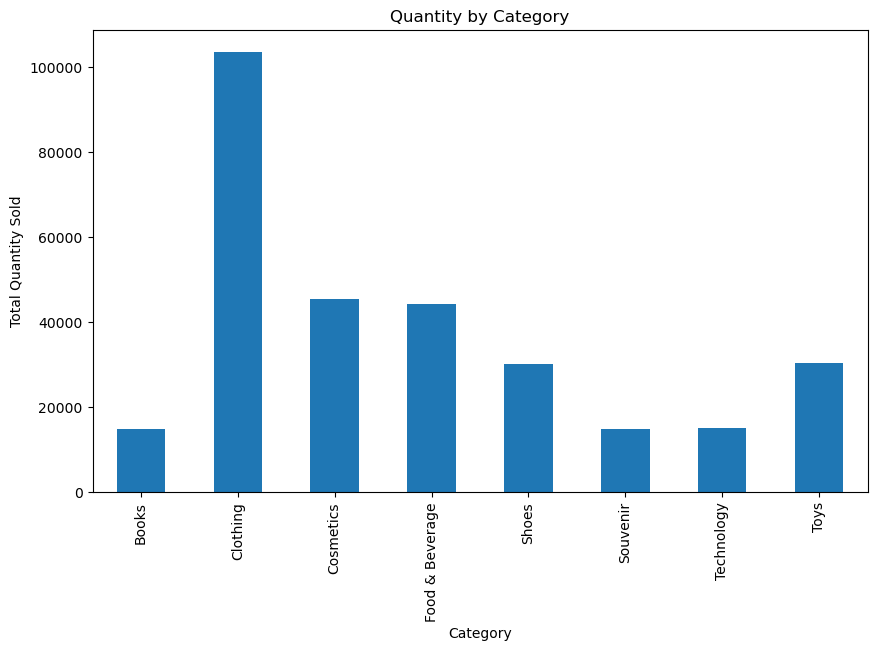

In [32]:
plt.figure(figsize=(10, 6))
quantity_by_category = cs.groupby('category')['quantity'].sum()
quantity_by_category.plot(kind='bar')
plt.title('Quantity by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.show()

v. Revenue by Shopping Mall

In [ ]:
plt.figure(figsize=(10, 6))
revenue_by_mall = cs.groupby('shopping_mall')['revenue'].sum()
revenue_by_mall.plot(kind='bar')
plt.title('Revenue by Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Revenue')
plt.show()

w. Average Price by Category (with Log Transformation)

In [ ]:
plt.figure(figsize=(10, 6))
price_by_category = cs.groupby('category')['price'].mean()
price_by_category.plot(kind='bar')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price (log scale)')
plt.yscale('log')  # Apply logarithmic transformation to the y-axis
plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])  # Set custom y-axis ticks
plt.show()

x. Quantity by Month Invoice & Shopping Malls (Top 5 Shopping Malls)

In [ ]:
plt.figure(figsize=(10, 6))
quantity_by_month_mall = cs_top_malls.groupby(['month_invoice', 'shopping_mall'])['quantity'].sum().unstack()
quantity_by_month_mall.plot(kind='bar')
plt.title('Quantity by Month Invoice and Shopping Mall (Top 5 Shopping Malls)')
plt.xlabel('Month Invoice')
plt.ylabel('Total Quantity Sold')
plt.show()

y. Bar Plot - Month & Revenue

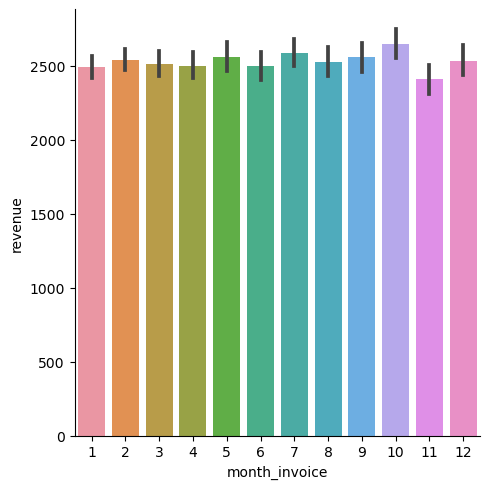

In [21]:
sns.catplot(data=cs, x='month_invoice',y='revenue', kind='bar')

z. Bar Plot - Year & Revenue

In [1]:
sns.catplot(data=cs, x='year_invoice',y='revenue', kind='box')

NameError: name 'sns' is not defined

21. Summary Statistics for Revenue by Year - Mean, Median, Standard Deviation, Minimum, Maximum & Count

In [23]:
print(cs.groupby('year_invoice')['revenue'].agg(['mean', 'median', 'std', 'min', 'max', 'count']))

                     mean  median          std   min      max  count
year_invoice                                                        
2021          2524.361434  600.17  4190.354105  5.23  26250.0  45382
2022          2534.232269  600.17  4247.054376  5.23  26250.0  45551
2023          2523.276581  600.17  4261.400250  5.23  26250.0   8524
